In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth, resample

In [2]:
# signal parameters
f_signal = 7          # frequency (Hz)
fs = 10               # sampling frequency (Hz)
duration = 1          # signal duration (seconds)

# continuous-time signal
t_cont = np.linspace(0, duration, 1000, endpoint=False)
original_signal = sawtooth(2 * np.pi * f_signal * t_cont)

In [3]:
# discrete-time sampling
t_sampled = np.arange(0, duration, 1 / fs)
sampled_signal = sawtooth(2 * np.pi * f_signal * t_sampled)

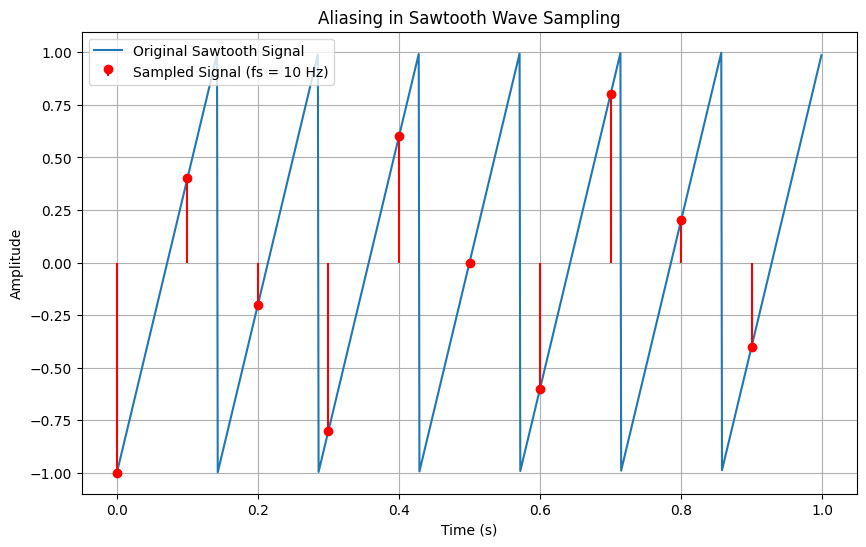

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(t_cont, original_signal, label="Original Sawtooth Signal")
plt.stem(t_sampled, sampled_signal,
         linefmt='r-', markerfmt='ro', basefmt=" ",
         label="Sampled Signal (fs = 10 Hz)")
plt.title("Aliasing in Sawtooth Wave Sampling")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [5]:
# reconstruct signal using resampling
num_points = 1000
reconstructed_signal = resample(sampled_signal, num_points)

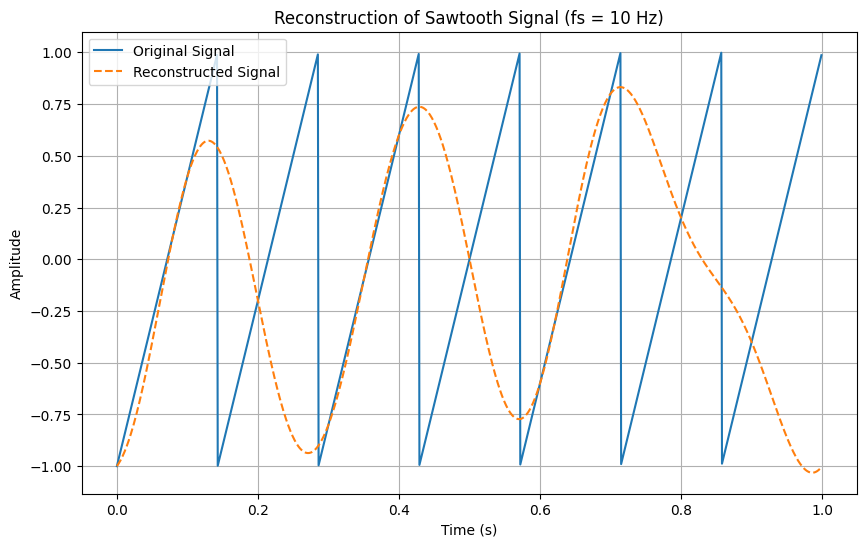

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(t_cont, original_signal, label="Original Signal")
plt.plot(t_cont, reconstructed_signal, linestyle='--',
         label="Reconstructed Signal")
plt.title("Reconstruction of Sawtooth Signal (fs = 10 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [8]:
import numpy as np
from scipy.fftpack import dct, idct

# given signal
signal = np.array([8, 16, 24, 32, 40, 48])
original_size = len(signal)

# thresholds to analyze
thresholds = [5, 10, 15]

print("Original Signal:", signal)
print()

for threshold in thresholds:
    # apply DCT
    dct_coeffs = dct(signal, norm='ortho')

    # apply thresholding (compression)
    compressed_coeffs = np.where(np.abs(dct_coeffs) >= threshold, dct_coeffs, 0)

    # compression ratio
    compressed_size = np.count_nonzero(compressed_coeffs)
    compression_ratio = original_size / compressed_size

    # reconstruct signal
    reconstructed_signal = idct(compressed_coeffs, norm='ortho')

    # distortion (MSE)
    mse = np.mean((signal - reconstructed_signal) ** 2)

    # display results
    print(f"Threshold = {threshold}")
    print("Compressed DCT Coefficients:", np.round(compressed_coeffs, 2))
    print("Reconstructed Signal:", np.round(reconstructed_signal, 2))
    print(f"Compression Ratio: {compression_ratio:.2f}")
    print(f"Distortion (MSE): {mse:.4f}")
    print("-" * 50)

Original Signal: [ 8 16 24 32 40 48]

Threshold = 5
Compressed DCT Coefficients: [ 68.59 -33.3    0.     0.     0.     0.  ]
Reconstructed Signal: [ 9.43 14.41 23.02 32.98 41.59 46.57]
Compression Ratio: 3.00
Distortion (MSE): 1.8462
--------------------------------------------------
Threshold = 10
Compressed DCT Coefficients: [ 68.59 -33.3    0.     0.     0.     0.  ]
Reconstructed Signal: [ 9.43 14.41 23.02 32.98 41.59 46.57]
Compression Ratio: 3.00
Distortion (MSE): 1.8462
--------------------------------------------------
Threshold = 15
Compressed DCT Coefficients: [ 68.59 -33.3    0.     0.     0.     0.  ]
Reconstructed Signal: [ 9.43 14.41 23.02 32.98 41.59 46.57]
Compression Ratio: 3.00
Distortion (MSE): 1.8462
--------------------------------------------------
